In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.shape

(381109, 12)

In [6]:
df.replace('?', np.nan, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None


In [7]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
# drop the first column
df = df.iloc[:,1:]

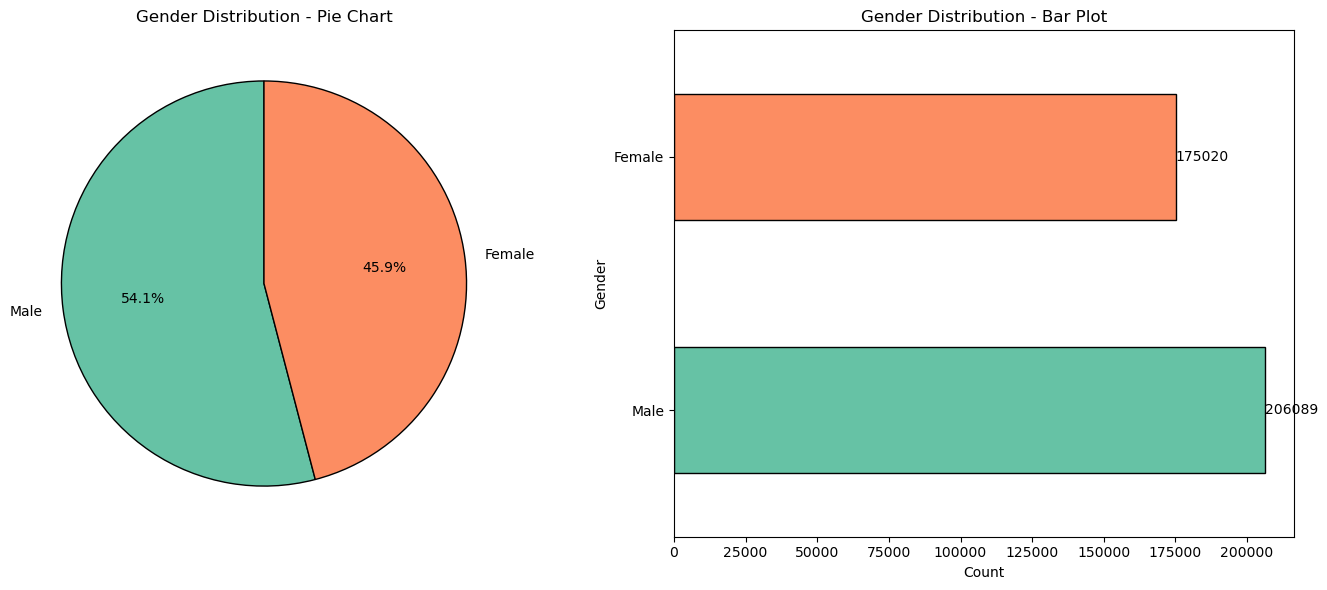

In [9]:
#Gender
counts = df['Gender'].value_counts().values

# Sample data for 'Gender' column (replace with actual df['Gender'] for your use case)
gender_counts = {'Male': counts[0], 'Female': counts[1]}
df_gender = pd.Series(gender_counts)

# Set the figure size
plt.figure(figsize=(14, 6))

# Create a 1x2 subplot for both the pie chart and bar plot
plt.subplot(1, 2, 1)
# Create the pie chart
plt.pie(df_gender, labels=df_gender.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"), startangle=90, wedgeprops={"edgecolor":"black"})
plt.title('Gender Distribution - Pie Chart')

# Create the horizontal bar plot on the second subplot
plt.subplot(1, 2, 2)
ax = df_gender.plot.barh(color=sns.color_palette("Set2"), edgecolor="black")
for index, value in enumerate(df_gender):
    ax.text(value + 10, index, str(value), va='center')

plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Gender Distribution - Bar Plot')

# Show the plot
plt.tight_layout()
plt.show()


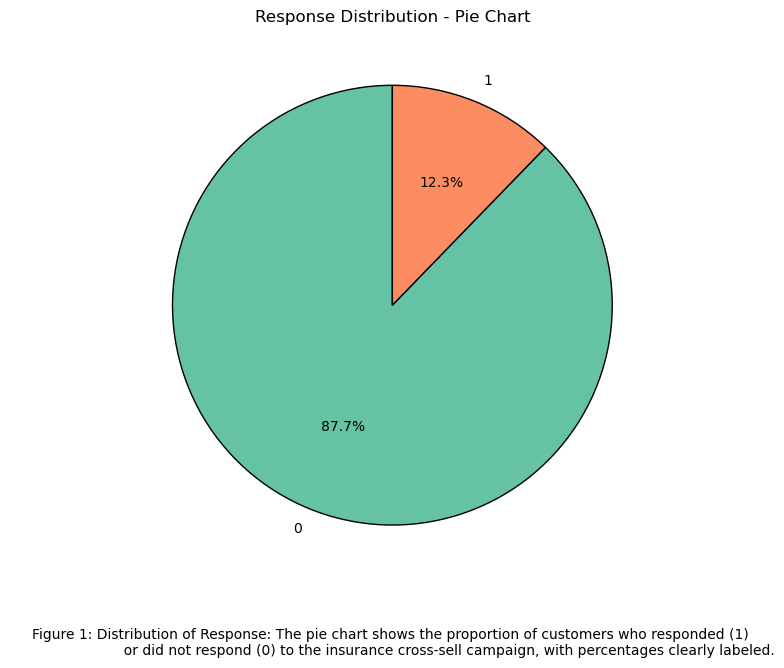

In [12]:
# distribution of response
counts = df['Response'].value_counts().values

# Sample data for 'Gender' column (replace with actual df['Gender'] for your use case)
gender_counts = {'0': counts[0], '1': counts[1]}
df_gender = pd.Series(gender_counts)

# Set the figure size
plt.figure(figsize=(14, 6))

# Create a 1x2 subplot for both the pie chart and bar plot

# Create the pie chart
plt.pie(df_gender, labels=df_gender.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"), startangle=90, wedgeprops={"edgecolor":"black"})
plt.title('Response Distribution - Pie Chart')



plt.title('Response Distribution - Pie Chart')
plt.figtext(0.5, -0.1, """Figure 1: Distribution of Response: The pie chart shows the proportion of customers who responded (1) 
                          or did not respond (0) to the insurance cross-sell campaign, with percentages clearly labeled.""", 
            ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [10]:
correct_order = ['< 1 Year','1-2 Year','> 2 Years']
df['Vehicle_Age'].value_counts().reindex(correct_order)

Vehicle_Age
< 1 Year     164786
1-2 Year     200316
> 2 Years     16007
Name: count, dtype: int64

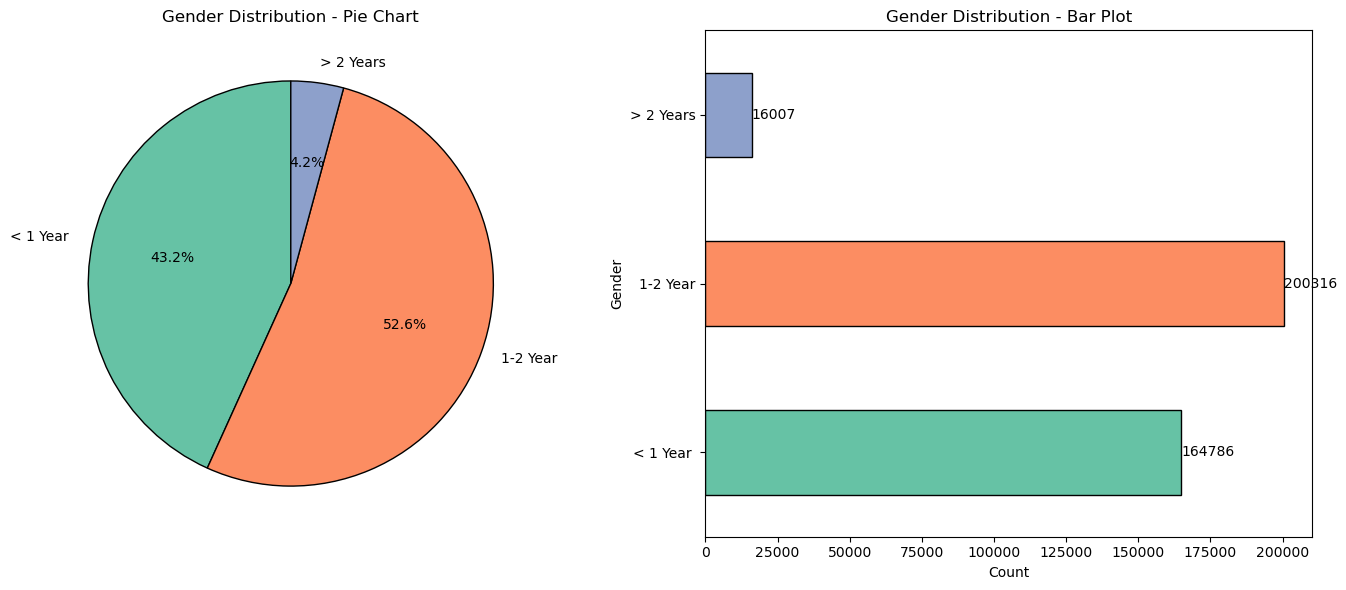

In [11]:
# Vehicle_Age
counts = df['Vehicle_Age'].value_counts().reindex(correct_order).values
# Set the figure size
# Sample data for 'Gender' column (replace with actual df['Gender'] for your use case)
gender_counts = {'< 1 Year ': counts[0], '1-2 Year': counts[1],'> 2 Years':counts[2]}
df_gender = pd.Series(gender_counts)
plt.figure(figsize=(14, 6))

# Create a 1x2 subplot for both the pie chart and bar plot
plt.subplot(1, 2, 1)
# Create the pie chart
plt.pie(df_gender, labels=df_gender.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"), startangle=90, wedgeprops={"edgecolor":"black"})
plt.title('Gender Distribution - Pie Chart')

# Create the horizontal bar plot on the second subplot
plt.subplot(1, 2, 2)
ax = df_gender.plot.barh(color=sns.color_palette("Set2"), edgecolor="black")
for index, value in enumerate(df_gender):
    ax.text(value + 10, index, str(value), va='center')

plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Gender Distribution - Bar Plot')

# Show the plot
plt.tight_layout()
plt.show()

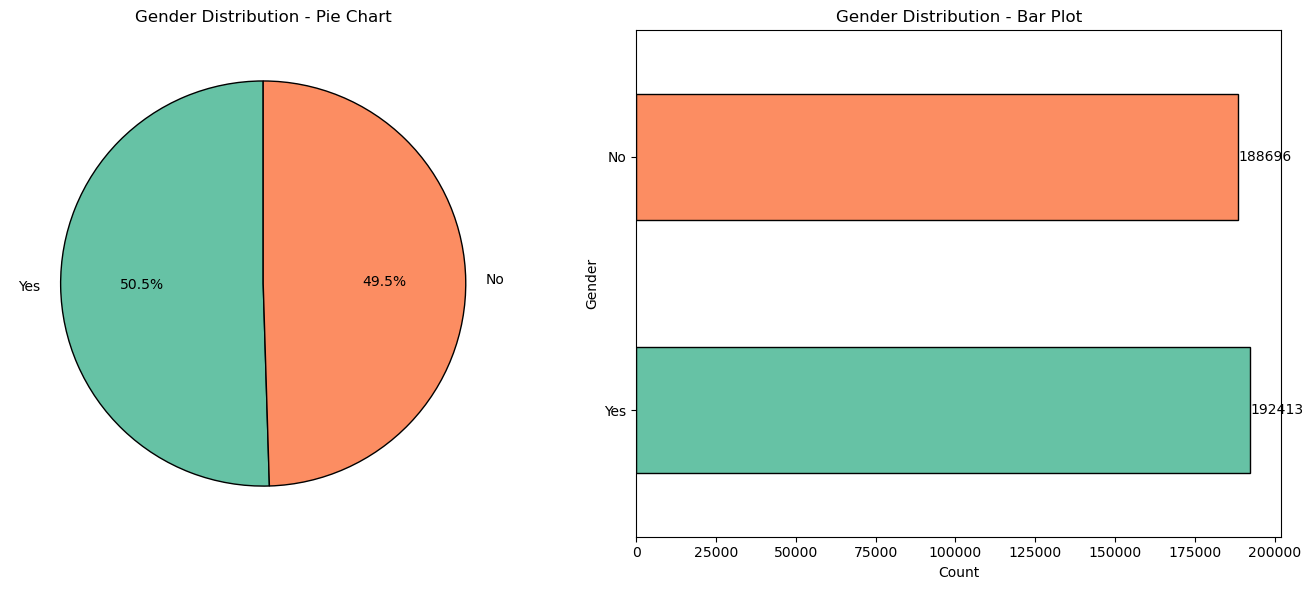

In [12]:
counts = df['Vehicle_Damage'].value_counts().values

# Sample data for 'Gender' column (replace with actual df['Gender'] for your use case)
gender_counts = {'Yes': counts[0], 'No': counts[1]}

# Set figure size and theme
df_gender = pd.Series(gender_counts)
plt.figure(figsize=(14, 6))

# Create a 1x2 subplot for both the pie chart and bar plot
plt.subplot(1, 2, 1)
# Create the pie chart
plt.pie(df_gender, labels=df_gender.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"), startangle=90, wedgeprops={"edgecolor":"black"})
plt.title('Gender Distribution - Pie Chart')

# Create the horizontal bar plot on the second subplot
plt.subplot(1, 2, 2)
ax = df_gender.plot.barh(color=sns.color_palette("Set2"), edgecolor="black")
for index, value in enumerate(df_gender):
    ax.text(value + 10, index, str(value), va='center')

plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Gender Distribution - Bar Plot')

# Show the plot
plt.tight_layout()
plt.show()

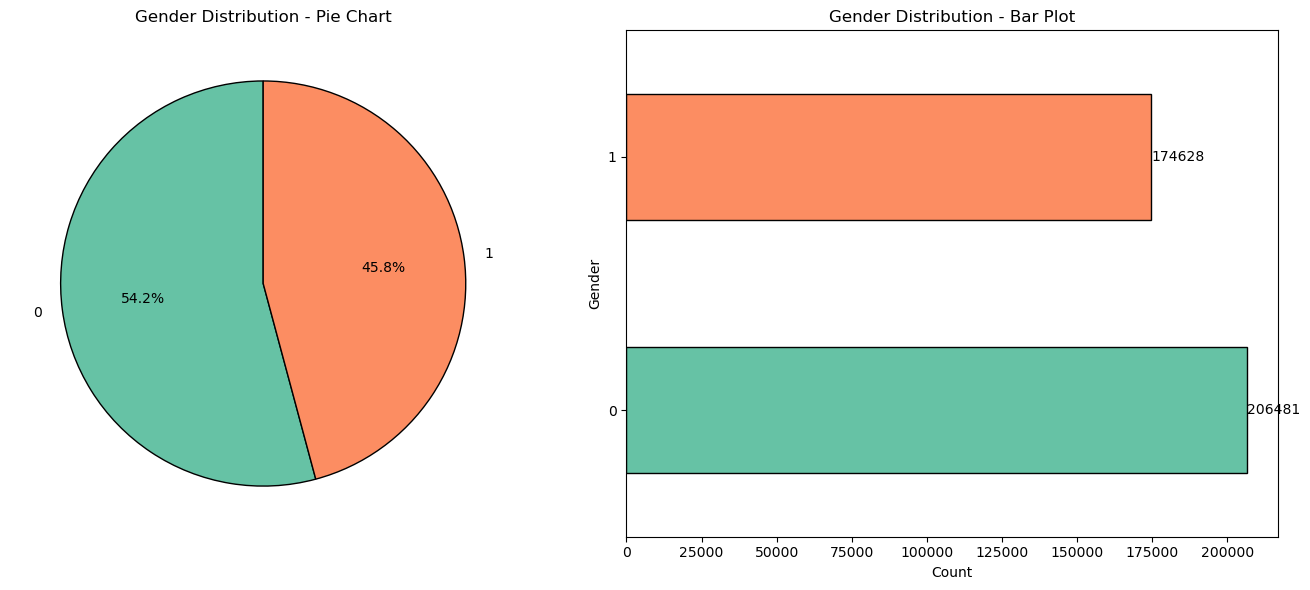

In [13]:
counts = df['Previously_Insured'].value_counts().values

# Sample data for 'Gender' column (replace with actual df['Gender'] for your use case)
gender_counts = {'0': counts[0], '1': counts[1]}

df_gender = pd.Series(gender_counts)
plt.figure(figsize=(14, 6))

# Create a 1x2 subplot for both the pie chart and bar plot
plt.subplot(1, 2, 1)
# Create the pie chart
plt.pie(df_gender, labels=df_gender.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"), startangle=90, wedgeprops={"edgecolor":"black"})
plt.title('Gender Distribution - Pie Chart')

# Create the horizontal bar plot on the second subplot
plt.subplot(1, 2, 2)
ax = df_gender.plot.barh(color=sns.color_palette("Set2"), edgecolor="black")
for index, value in enumerate(df_gender):
    ax.text(value + 10, index, str(value), va='center')

plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Gender Distribution - Bar Plot')

# Show the plot
plt.tight_layout()
plt.show()

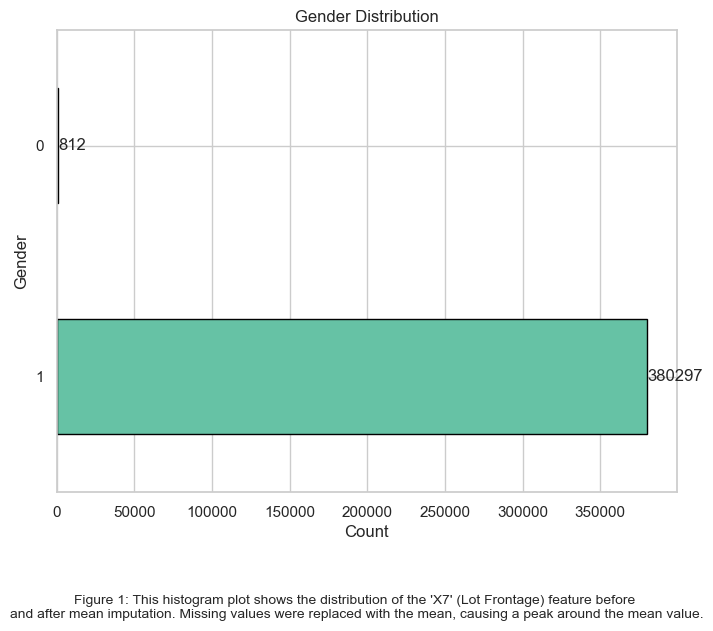

In [14]:
# driving licence
counts = df['Driving_License'].value_counts().values

# Sample data for 'Gender' column (replace with actual df['Gender'] for your use case)
gender_counts = {'1': counts[0], '0': counts[1]}
df_gender = pd.Series(gender_counts)

# Set figure size and theme
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

# Create a horizontal bar plot with nicer colors (use seaborn palette)
ax = df_gender.plot.barh(color=sns.color_palette("Set2"), edgecolor="black")

# Add labels for the count of each bar
for index, value in enumerate(df_gender):
    ax.text(value + 10, index, str(value), va='center')

# Set axis labels and title
plt.figtext(0.5, -0.1, """Figure 1: This histogram plot shows the distribution of the 'X7' (Lot Frontage) feature before 
and after mean imputation. Missing values were replaced with the mean, causing a peak around the mean value.""", 
            ha='center', fontsize=10)
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Gender Distribution')

# Display the plot
plt.show()


In [9]:
def plot_numerical(f,  dataset=df):
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    plt.suptitle(f'{f}')
    ax[0].set_title('Age distribution split by target')
    sns.kdeplot(data=dataset, x=f, hue='Response', cut=0, bw_adjust=1.5, ax=ax[0])
    ax[1].set_title('Feature distribution for positive class')
    sns.kdeplot(data=dataset[dataset['Response']==1], x=f, cut=0, bw_adjust=1.5, ax=ax[1])
    fig.tight_layout()
    plt.show()

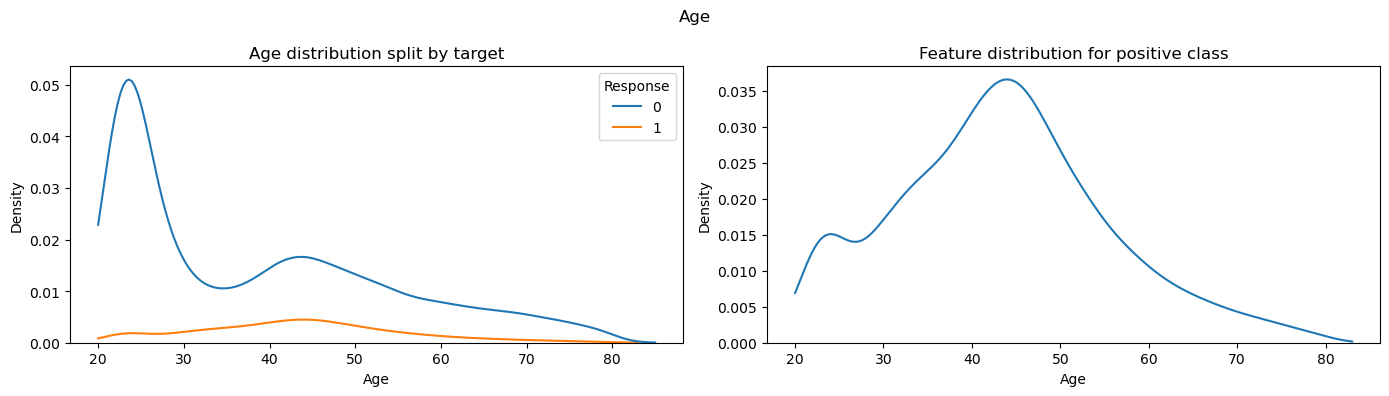

In [10]:
plot_numerical('Age',df)

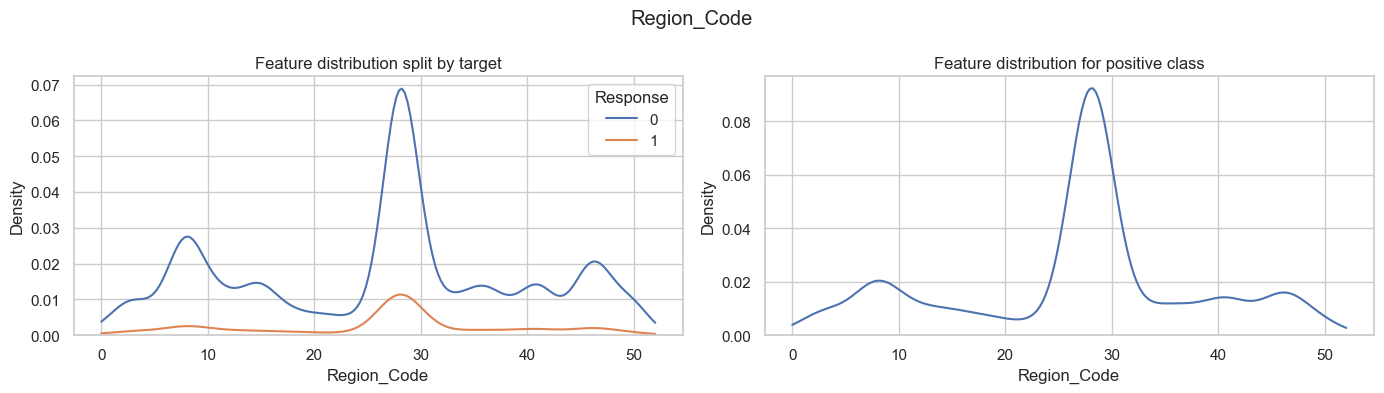

In [35]:
plot_numerical('Region_Code',df)

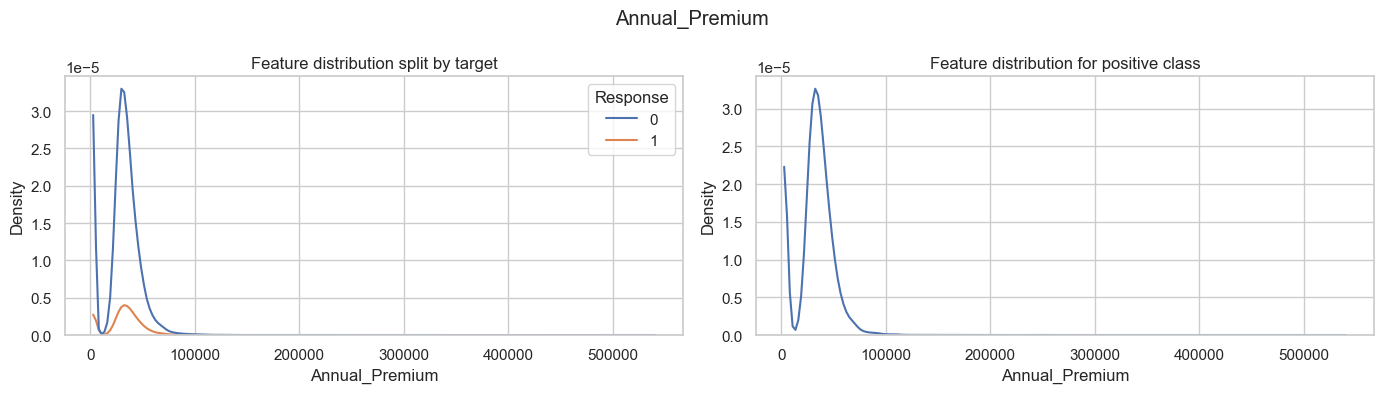

In [36]:
# Annual_Premium
# Policy_Sales_Channel
# Vintage
plot_numerical('Annual_Premium',df)

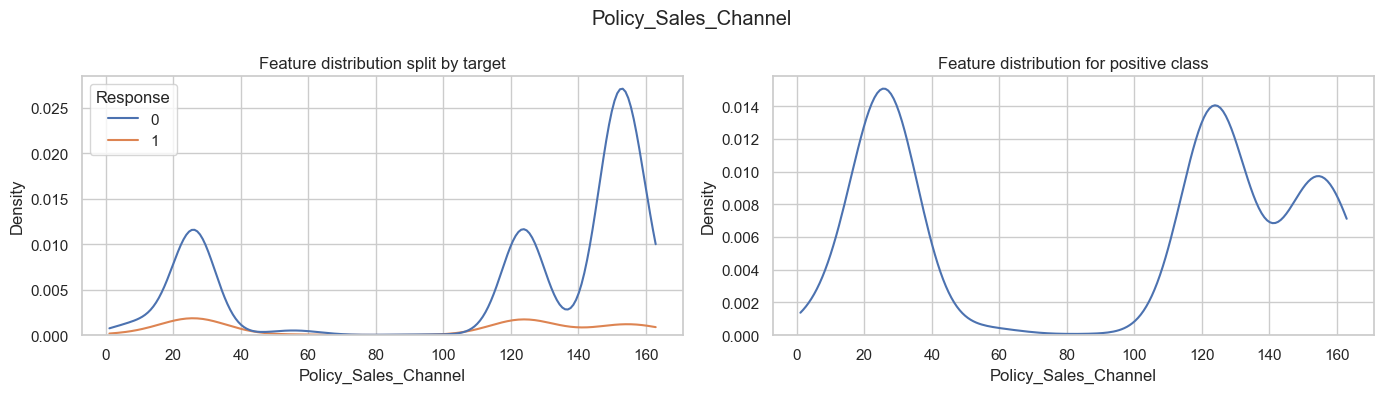

In [37]:
# Policy_Sales_Channel
# Vintage
plot_numerical('Policy_Sales_Channel',df)

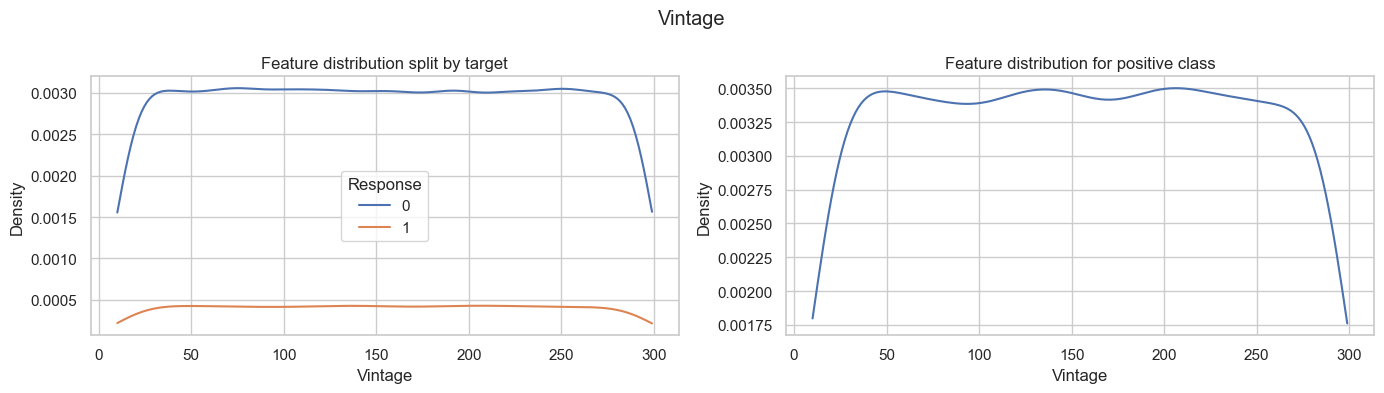

In [39]:
# Vintage
plot_numerical('Vintage',df)

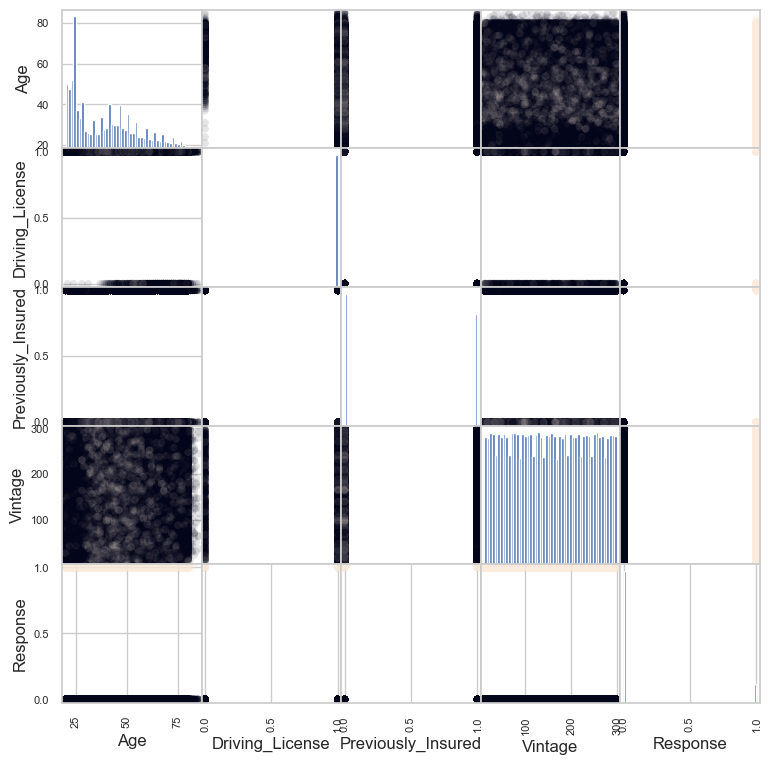

In [15]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(9, 9),c = pd.get_dummies(df['Response']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.show()

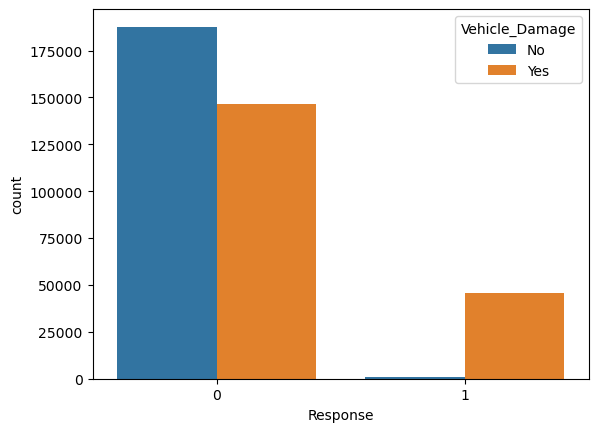

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
data = sns.load_dataset("titanic")

# Plot a count plot for two categorical variables
sns.countplot(x='Response', hue='Vehicle_Damage', data=df)

plt.show()

In [7]:
sampled_data = df.sample(n=2000, random_state=42)
sampled_data.shape
X = sampled_data.iloc[:, :-1]
y = sampled_data['Response']

(2000, 11)

In [8]:
X = sampled_data.iloc[:, :-1]
y = sampled_data['Response']

# collect which encoder to use on each feature

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 200222 to 369379
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                2000 non-null   object 
 1   Age                   2000 non-null   int64  
 2   Driving_License       2000 non-null   int64  
 3   Region_Code           2000 non-null   float64
 4   Previously_Insured    2000 non-null   int64  
 5   Vehicle_Age           2000 non-null   object 
 6   Vehicle_Damage        2000 non-null   object 
 7   Annual_Premium        2000 non-null   float64
 8   Policy_Sales_Channel  2000 non-null   float64
 9   Vintage               2000 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 171.9+ KB


In [82]:
def basic_split(X,y, train_size, val_size, test_size,random_state):
    
    #test inputs
    #check the inputs
    if train_size+ val_size+ test_size !=1:
        raise TypeError("The sum of train_size, val_size, test_size is 1")
    if not isinstance(random_state, int):
        raise TypeError("Random_state is an integer must be an integer")

    #split the dataset
    other_size = (val_size + test_size)
    X_train, X_other, y_train, y_other = train_test_split(X,y,\
                    train_size = train_size,stratify=y,random_state = random_state)


    # second split to separate out the validation and test sets
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = val_size/other_size,stratify=y_other,
    random_state = random_state)

    print(X_train.shape)
    print(X_val.shape)
    print(X_test.shape)

    # #print the result
    # print("X_train:")
    # print(X_train.head())

    # print("\nX_val:")
    # print(X_val.head())

    # print("\nX_test:")
    # print(X_test.head())

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X,y, train_size=0.6, val_size=0.2, test_size=0.2, random_state=42)

(1200, 10)
(400, 10)
(400, 10)


In [83]:
# needs to be done manually
ordinal_ftrs = ['Vehicle_Age'] 
ordinal_cats = [['< 1 Year','1-2 Year','> 2 Years']]
onehot_ftrs = ['Gender','Previously_Insured']
minmax_ftrs = ['Age']
std_ftrs = ['Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)],
remainder='passthrough' )

prep = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = prep.fit_transform(X_train)

X_val_prep = prep.transform(X_val)

X_test_prep = prep.transform(X_test)

In [84]:
print(X_train_prep.shape)
print(X_val_prep.shape)
print(X_test_prep.shape)

(1200, 12)
(400, 12)
(400, 12)


In [29]:
nr_states = 5
test_scores = np.zeros(nr_states)
final_models = []
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

In [ ]:
# Plot Precision-Recall vs Threshold
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()

In [ ]:
def MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid):
    
    # lists to be returned 
    test_scores = []
    best_models = []

    # your code here...
    for i in range(10):
        print('randoms state '+str(i+1))
        # first split to separate out the training set
        X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=42*i)

    # second split to separate out the validation and test sets
        X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=42*i)

        clf = Pipeline(steps=[('preprocessor', preprocessor),('ML_algo',ML_algo)])

        kfold = KFold(n_splits=4, shuffle=True, random_state=i)

        grid_search = GridSearchCV(clf, param_grid, cv=kfold, scoring='neg_mean_squared_error',verbose=0, n_jobs=-1)
        grid_search.fit(X_other, y_other)
        #print("Best parameters: ", grid_search.best_params_)
        
        
        best_model = grid_search.best_estimator_
        best_models.append(best_model)
        
    
        y_pred = best_model.predict(X_test)
        test_MSE = root_mean_squared_error(y_test,y_pred)
        test_scores.append(test_MSE)
        #print(f"Test RMSE: {test_MSE}")

    return test_scores, best_models

In [ ]:
#logistic

In [58]:
print(sum(df['Response']==1))
print(sum(df['Response']==0))

46710
334399


In [40]:
#SVM
X = sampled_data.iloc[:, :-1]
y = sampled_data['Response']

ordinal_ftrs = ['Vehicle_Age'] 
ordinal_cats = [['< 1 Year','1-2 Year','> 2 Years']]
onehot_ftrs = ['Gender','Vehicle_Damage']
minmax_ftrs = ['Age']
std_ftrs = ['Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)],
remainder='passthrough' )
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)],
remainder='passthrough' )

prep = Pipeline(steps=[('preprocessor', preprocessor)])

for i in range(nr_states):
    print('randoms state '+str(i+1))

    # first split to separate out the training set
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=42*i)

    # second split to separate out the validation and test sets
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=42*i)
    
    # preprocess the sets
    X_train_prep = prep.fit_transform(X_train)
    X_val_prep = prep.transform(X_val)
    X_test_prep = prep.transform(X_test)


randoms state 1
randoms state 2
randoms state 3
randoms state 4
randoms state 5


Random State 1
Best Parameters: {'ML_algo__max_depth': 10, 'ML_algo__max_features': 0.5}


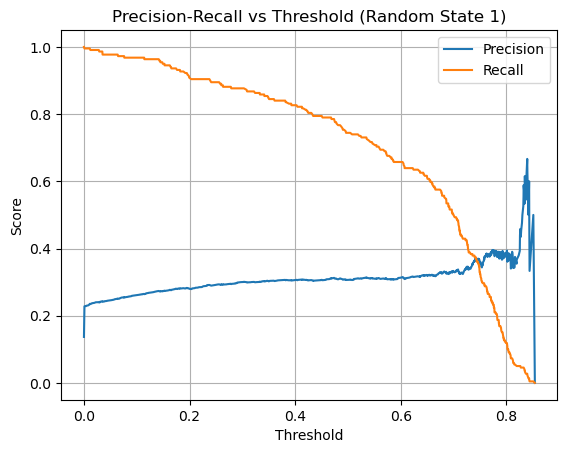

Best Threshold for F1-Score: 0.38
Test Metrics with Adjusted Threshold - Precision: 0.3067, Recall: 0.8402, F1-Score: 0.4493
Random State 2
Best Parameters: {'ML_algo__max_depth': 10, 'ML_algo__max_features': 0.5}


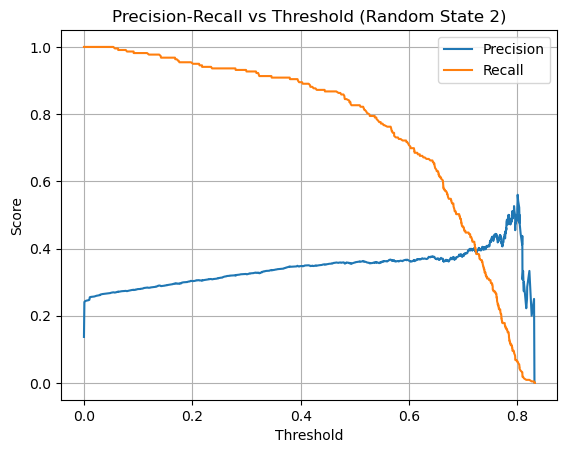

Best Threshold for F1-Score: 0.47
Test Metrics with Adjusted Threshold - Precision: 0.3585, Recall: 0.8676, F1-Score: 0.5073
Random State 3
Best Parameters: {'ML_algo__max_depth': 10, 'ML_algo__max_features': 0.5}


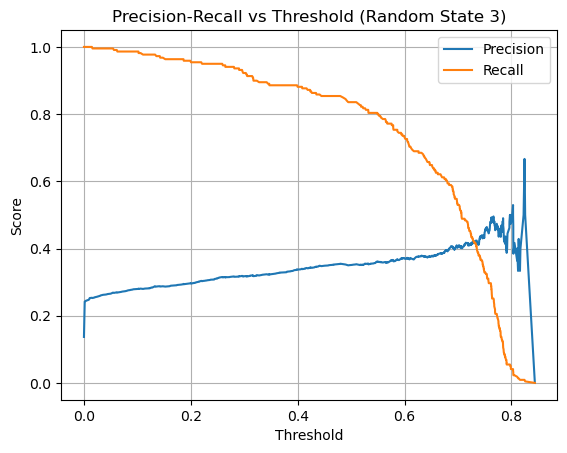

Best Threshold for F1-Score: 0.48
Test Metrics with Adjusted Threshold - Precision: 0.3548, Recall: 0.8539, F1-Score: 0.5013
Random State 4
Best Parameters: {'ML_algo__max_depth': 10, 'ML_algo__max_features': 0.75}


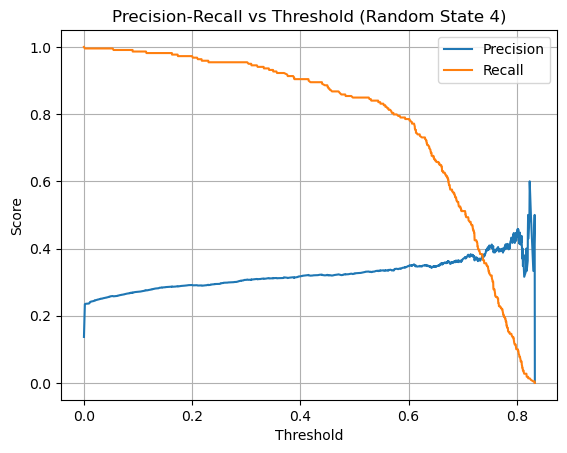

Best Threshold for F1-Score: 0.61
Test Metrics with Adjusted Threshold - Precision: 0.3528, Recall: 0.7717, F1-Score: 0.4842
Random State 5
Best Parameters: {'ML_algo__max_depth': 10, 'ML_algo__max_features': 0.5}


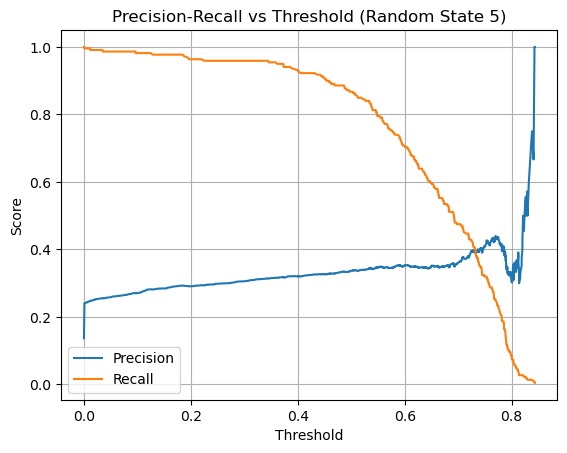

Best Threshold for F1-Score: 0.53
Test Metrics with Adjusted Threshold - Precision: 0.3446, Recall: 0.8402, F1-Score: 0.4887


In [64]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, auc

from sklearn.model_selection import StratifiedKFold


# Define the number of random states for testing
nr_states = 5
test_scores = np.zeros(nr_states)
final_models = []

# Preprocessor (Replace with your preprocessing logic)
preprocessor = prep  # Assuming `prep` is already defined

for i in range(nr_states):
    print(f"Random State {i+1}")
    
    # Split data into training and test sets
    X_other, X_test, y_other, y_test = train_test_split(X,y,\
                    train_size = 0.8,stratify=y,random_state = i)
    
    # Define parameter grid for RandomForestClassifier
    param_grid = {
        'ML_algo__max_depth': [5, 10, 15, 20, 25,50],
        'ML_algo__max_features': [0.5, 0.75, 1.0]
    }

    # preprocess the sets
    X_other_prep = prep.fit_transform(X_other)
    
    # Define the pipeline with preprocessing and the model
    clf = Pipeline(steps=[
        ('ML_algo', RandomForestClassifier(class_weight='balanced', random_state=42))
    ])

    kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)
    #StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    grid_search = GridSearchCV(clf, param_grid, cv=kfold, scoring='f1',verbose=0, n_jobs=-1)
    grid_search.fit(X_other_prep, y_other)
        #print("Best parameters: ", grid_search.best_params_)
    
    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best Parameters: {best_params}")
    
    # Evaluate on validation and test sets
    X_test_prep = prep.transform(X_test)  # Transform the test data
    y_test_probs = best_model.predict_proba(X_test_prep)[:, 1]
    
    # Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_probs)
    
    # Plot Precision-Recall vs Threshold
    plt.figure()
    plt.plot(thresholds, precision[:-1], label="Precision")
    plt.plot(thresholds, recall[:-1], label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(f"Precision-Recall vs Threshold (Random State {i+1})")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Compute F1-scores for each threshold
    f1_scores = [f1_score(y_test, (y_test_probs >= t).astype(int)) for t in thresholds]
    best_threshold = thresholds[np.argmax(f1_scores)]
    print(f"Best Threshold for F1-Score: {best_threshold:.2f}")
    
    # Evaluate using the best threshold
    y_test_pred_adjusted = (y_test_probs >= best_threshold).astype(int)
    precision_test = precision_score(y_test, y_test_pred_adjusted)
    recall_test = recall_score(y_test, y_test_pred_adjusted)
    f1_test = f1_score(y_test, y_test_pred_adjusted)
    
    
    print(f"Test Metrics with Adjusted Threshold - Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1-Score: {f1_test:.4f}")
    
    # Save the best model
    final_models.append(best_model)
    test_scores[i] = f1_test



In [47]:
sampled_data = df.sample(n=8000, random_state=42)
sampled_data.shape
X = sampled_data.iloc[:, :-1]
y = sampled_data['Response']

In [70]:
sorted_values_desc = sorted(X['Policy_Sales_Channel'].unique(),reverse=False)
print(sorted_values_desc)


[1.0, 3.0, 4.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 29.0, 30.0, 31.0, 36.0, 37.0, 38.0, 44.0, 45.0, 47.0, 49.0, 51.0, 52.0, 54.0, 55.0, 59.0, 60.0, 61.0, 64.0, 66.0, 67.0, 73.0, 78.0, 79.0, 86.0, 88.0, 89.0, 91.0, 93.0, 98.0, 100.0, 103.0, 106.0, 107.0, 109.0, 111.0, 113.0, 116.0, 119.0, 120.0, 122.0, 124.0, 125.0, 127.0, 128.0, 130.0, 133.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 145.0, 147.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 163.0]


In [71]:
# Check the frequency of each category
print(X['Policy_Sales_Channel'].value_counts())

Policy_Sales_Channel
152.0    2761
124.0    1644
26.0     1621
160.0     465
156.0     241
         ... 
98.0        1
66.0        1
73.0        1
91.0        1
130.0       1
Name: count, Length: 88, dtype: int64
